In [121]:
import matplotlib.pyplot as plt

def plot(xs, ys, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.plot(xs, ys)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    plt.show()
    
def decode_score(shift):
    def decode(symbol):
        return ord(symbol) - shift
    
    return decode

# 1. GC состав

In [142]:
def gc(path, decode=decode_score(64), quality_threshold=10, good_nucleotides_perc_threshold=50):
    f = open(path, 'r')
    
    sums = {}
    xs = list(range(101))
    for x in xs:
        sums[x] = 0
    
    while True:
        name = f.readline()
        if not name:
            break
            
        seq = f.readline()
        f.readline()
        quality = f.readline()
        tuples = zip(seq[:-1], map(decode, quality[:-1]))
        filtered = filter(lambda x: x[1]>quality_threshold, tuples)
        filtered_seq = ''.join(list(map(lambda x: x[0], filtered)))
        
        if len(filtered_seq) > (good_nucleotides_perc_threshold/100)*len(seq):
            percent = percent_gc(filtered_seq.replace('N', ''))
            sums[percent] += 1
    
    f.close()
    
    tuples = []
    for k, v in sums.items():
        tuples.append((k, v))

    tuples.sort(key=lambda x:x[0])

    ys = list(map(lambda x:x[1], tuples))
    
    plot(xs, ys, '%GC', 'number of reads')
    
def percent_gc(seq):
    gc_count = 0
    for s in seq:
        if s == 'G' or s == 'C':
            gc_count += 1
            
    return round(100*gc_count/len(seq))

## test.fastq

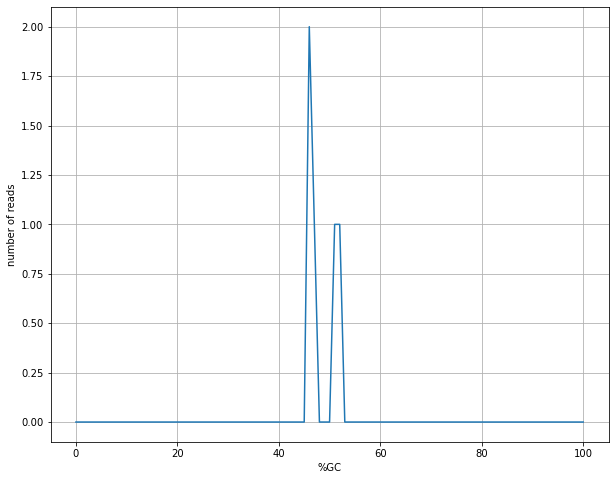

In [143]:
gc('test.fastq')

## test3.fastq

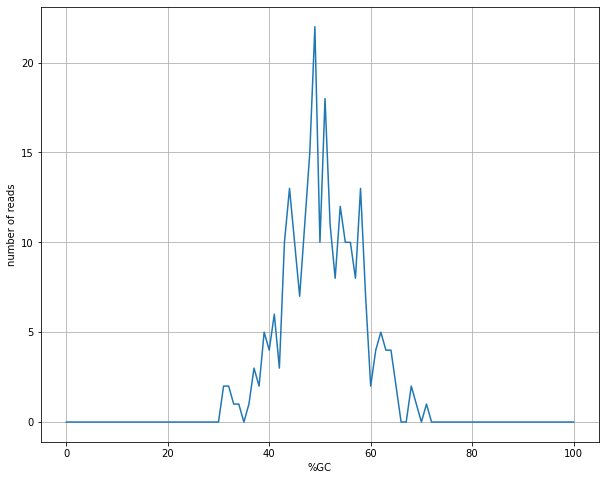

In [145]:
gc('test3.fastq', decode=decode_score(33), quality_threshold=15)

## frag.R1.fastq

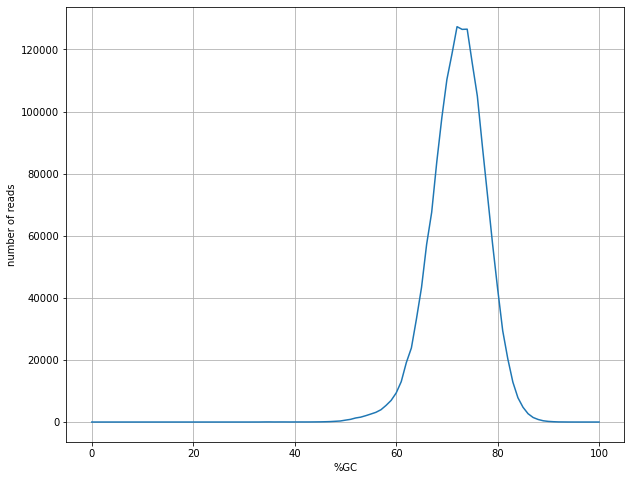

In [146]:
gc('frag.R1.fastq')

## frag.R2.fastq

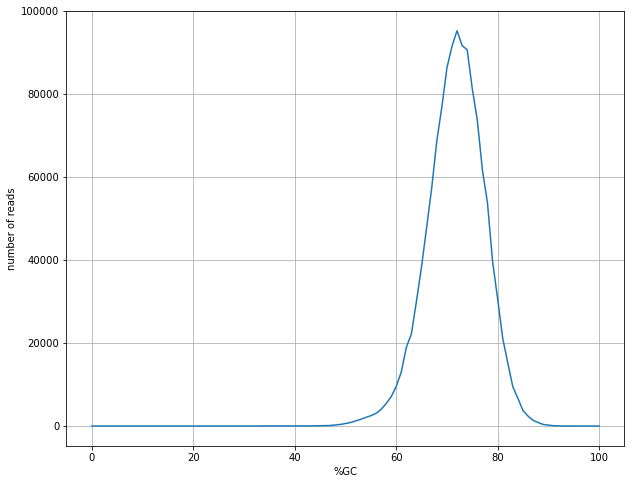

In [147]:
gc('frag.R2.fastq')

# 2. Распределение качества

In [122]:
import math

def quality(path, decode, ylabel):
    f = open(path, 'r')

    sums = {}
    counts = {}
    while True:
        name = f.readline()
        if not name:
            break

        f.readline()
        f.readline()

        quality = f.readline()
        for i in range(len(quality)-1):
            q = decode(quality[i])
            if i in sums:
                sums[i] += q
                counts[i] += 1
            else:
                sums[i] = q
                counts[i] = 1

    f.close()

    tuples = []
    for k, v in sums.items():
        tuples.append((k, v/counts[k]))

    tuples.sort(key=lambda x:x[0])

    xs = list(map(lambda x:x[0], tuples))
    ys = list(map(lambda x:x[1], tuples))
    
    plot(xs, ys, 'bp', ylabel)

def decode_prob(shift):
    def decode(symbol):
        return 10**(-(ord(symbol) - shift)/10)
    
    return decode

## test.fastq

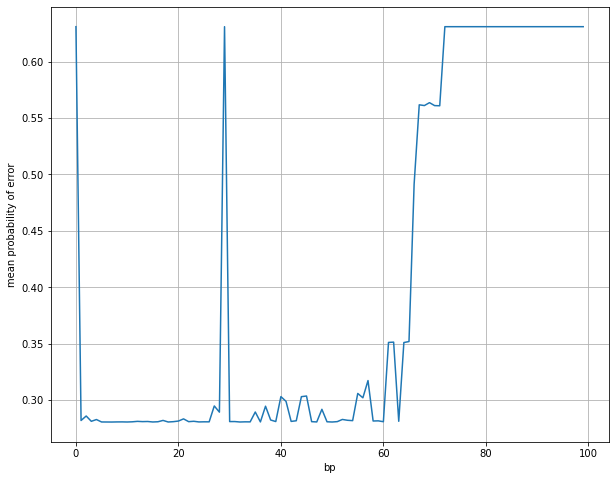

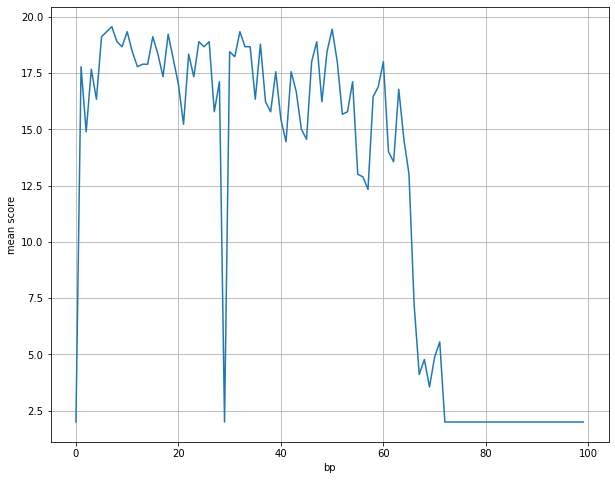

In [76]:
quality('test.fastq', decode_prob(64), 'mean probability of error')
quality('test.fastq', decode_score(64), 'mean score')

## test3.fastq

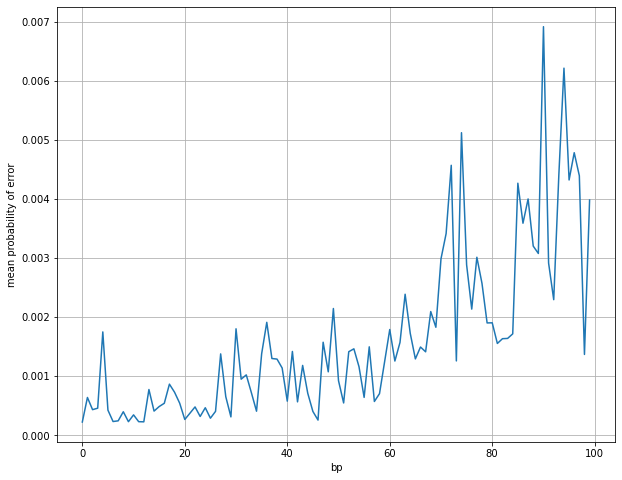

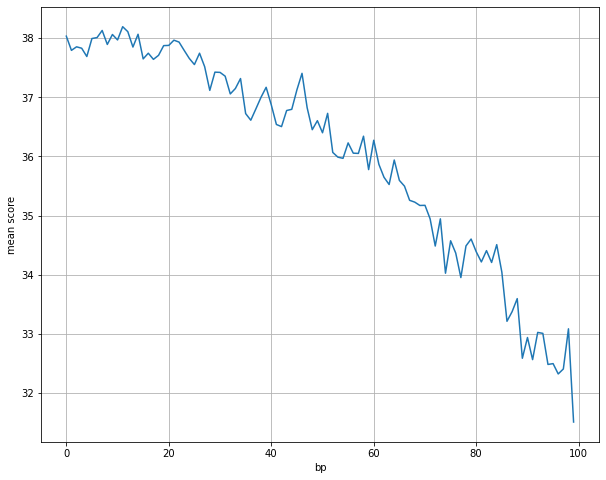

In [77]:
quality('test3.fastq', decode_prob(33), 'mean probability of error')
quality('test3.fastq', decode_score(33), 'mean score')

## frag.R1.fastq

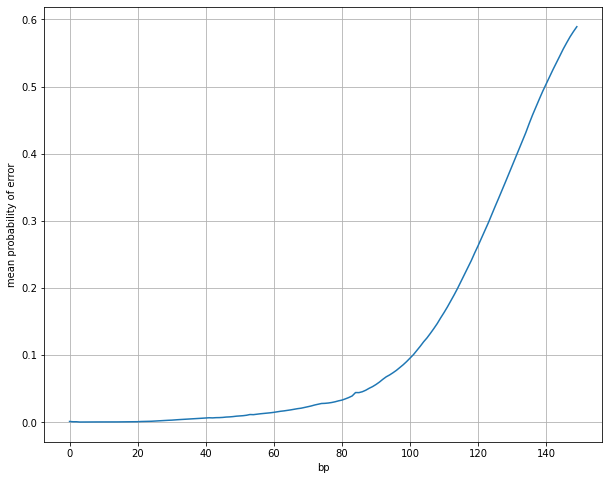

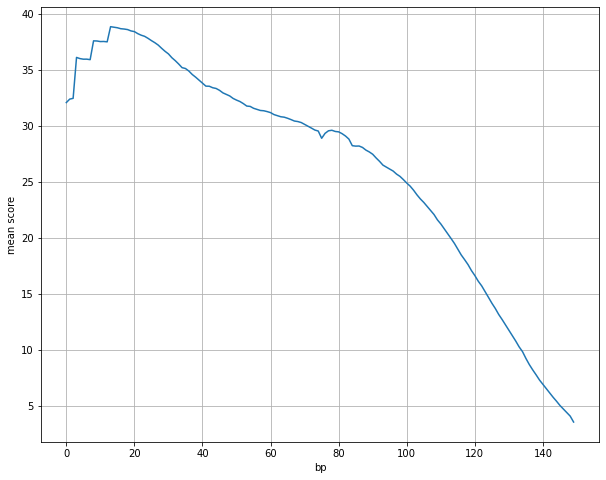

In [78]:
quality('frag.R1.fastq', decode_prob(64), 'mean probability of error')
quality('frag.R1.fastq', decode_score(64), 'mean score')

## frag.R2.fastq

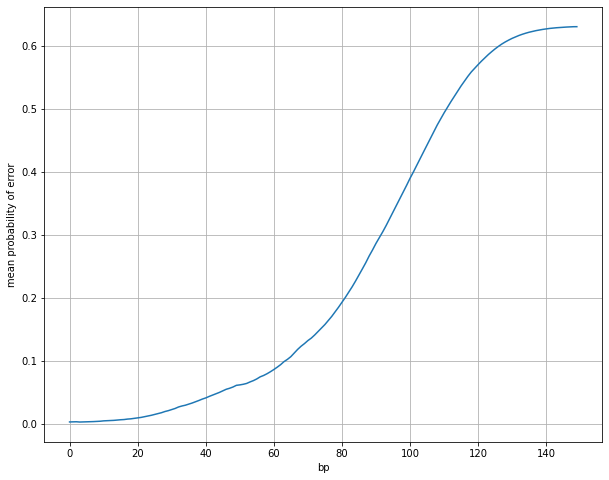

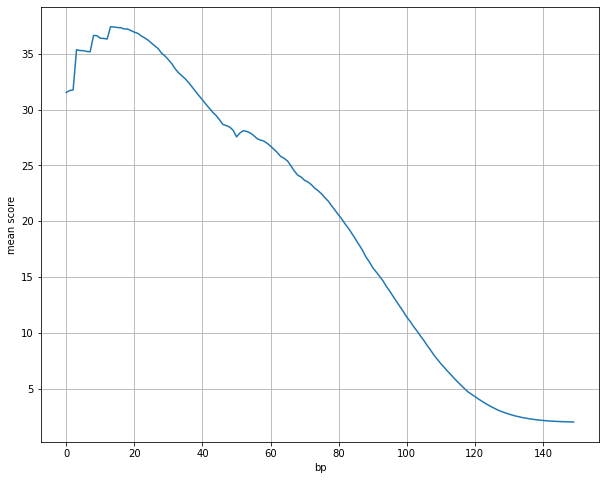

In [79]:
quality('frag.R2.fastq', decode_prob(64), 'mean probability of error')
quality('frag.R2.fastq', decode_score(64), 'mean score')

# 3. Проверка результатов

## test.fastq

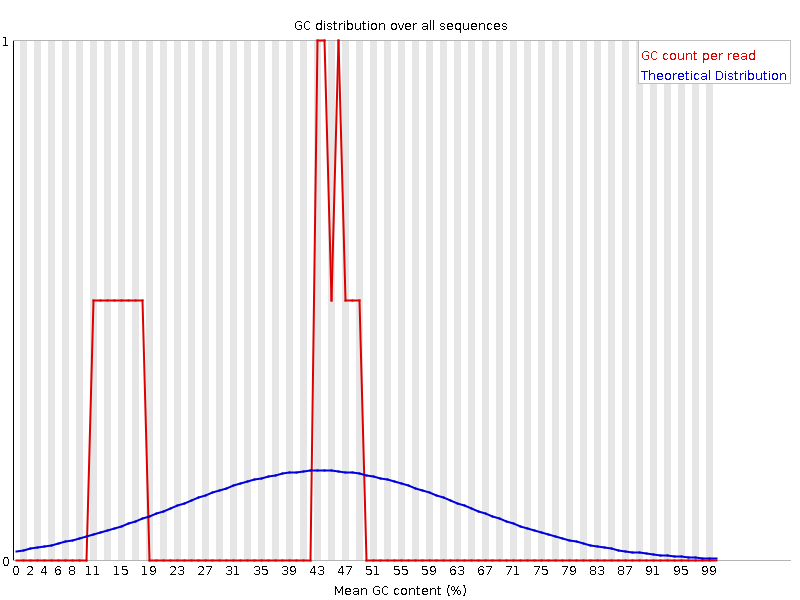

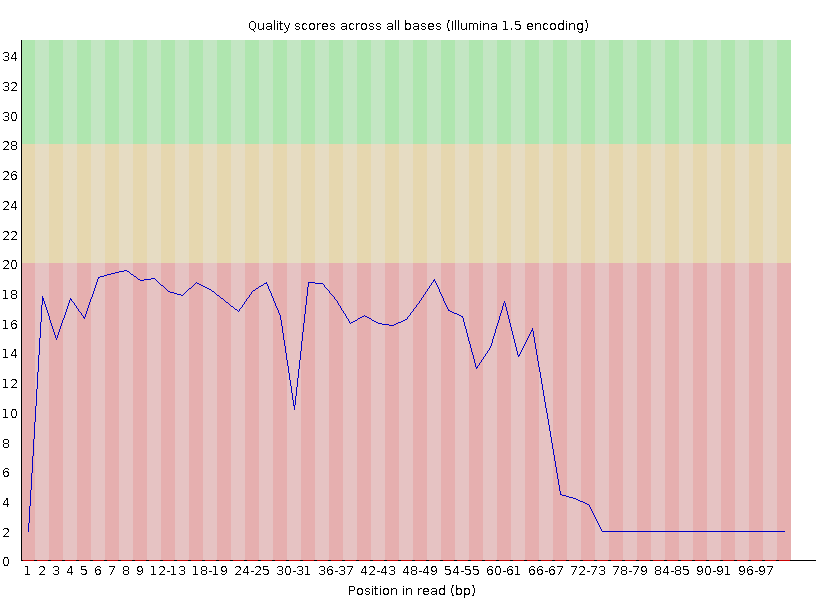

## test3.fastq

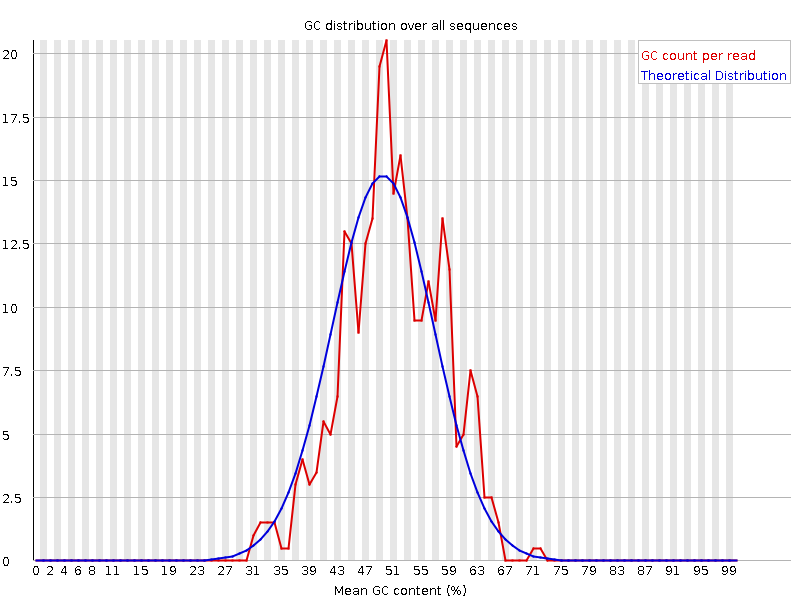

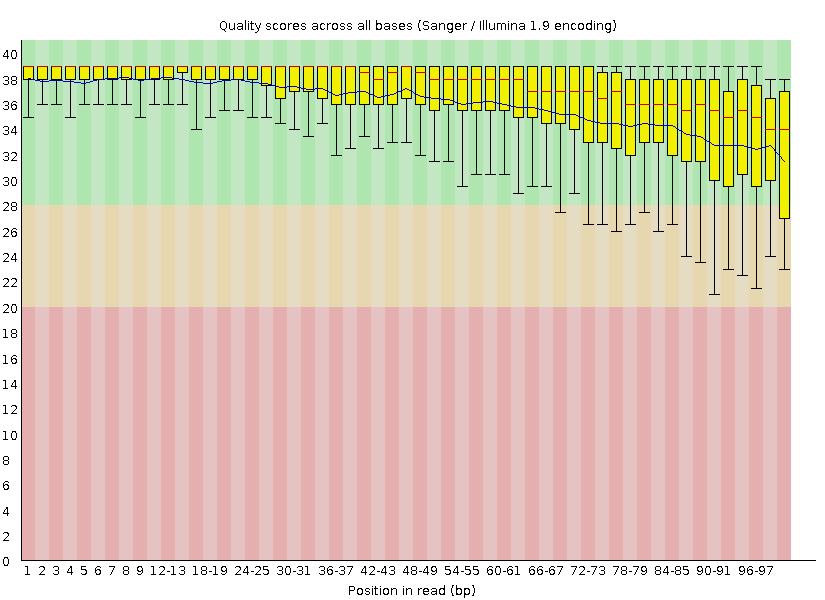

## frag.R1.fastq

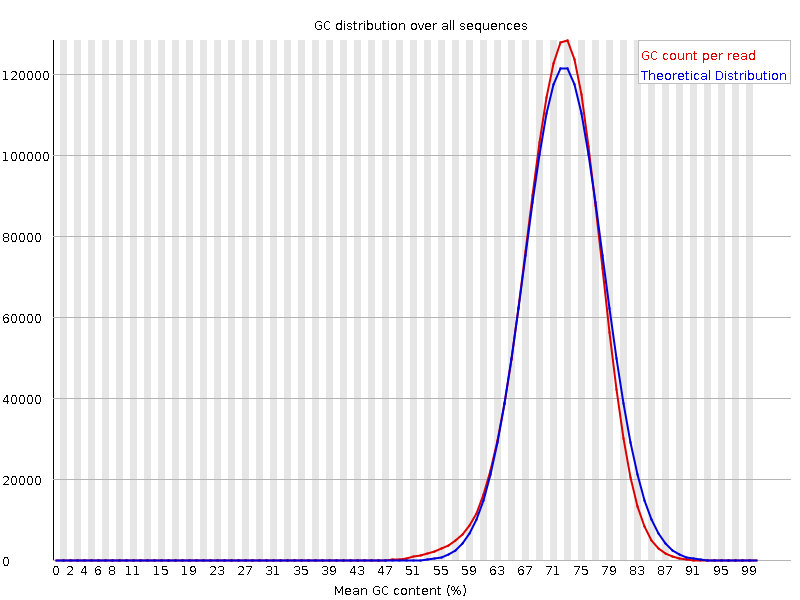

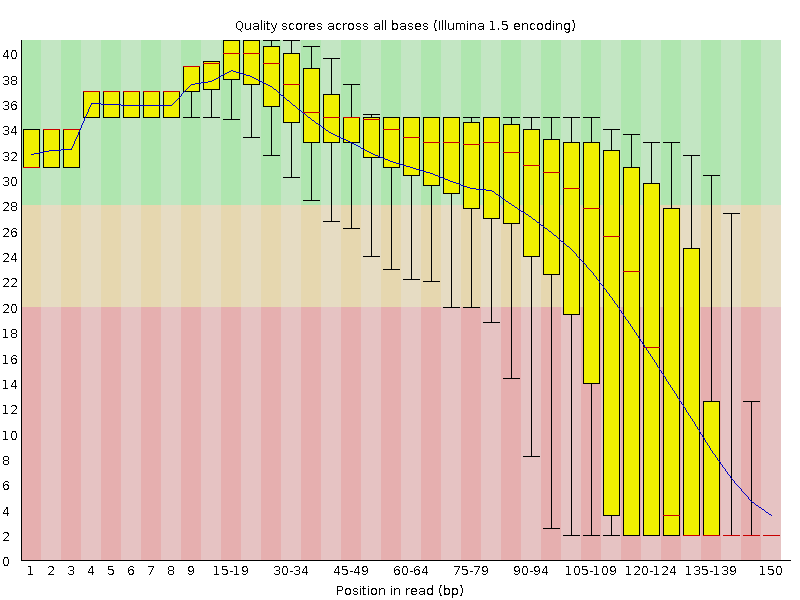

## frag.R2.fastq

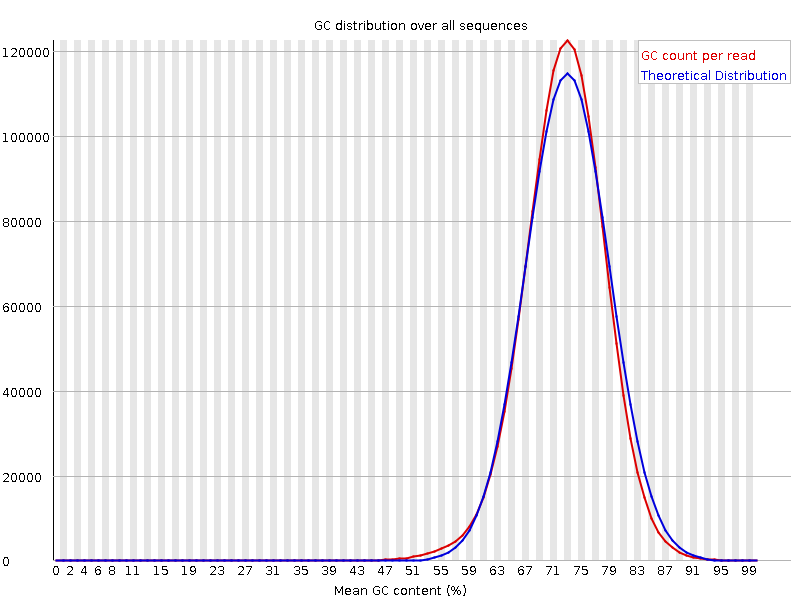

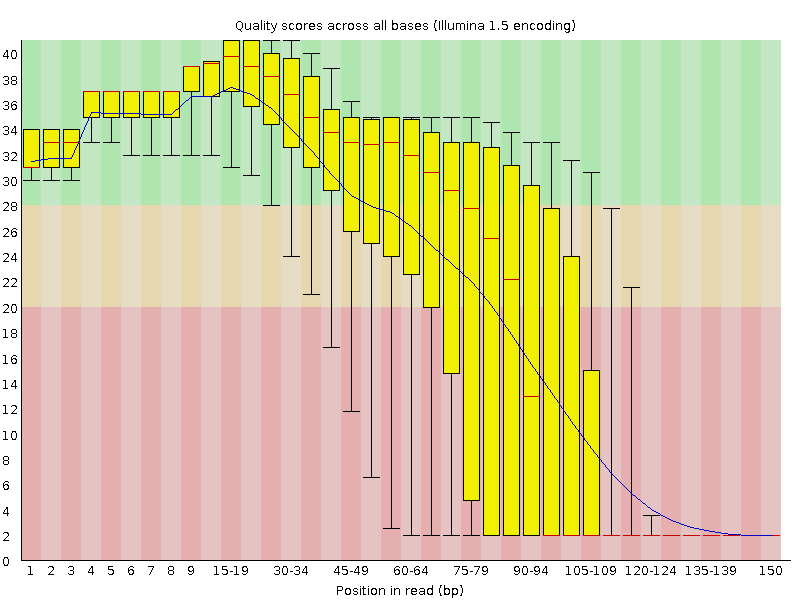